In [1]:
import numpy as np
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import gratings

<IPython.core.display.Javascript object>


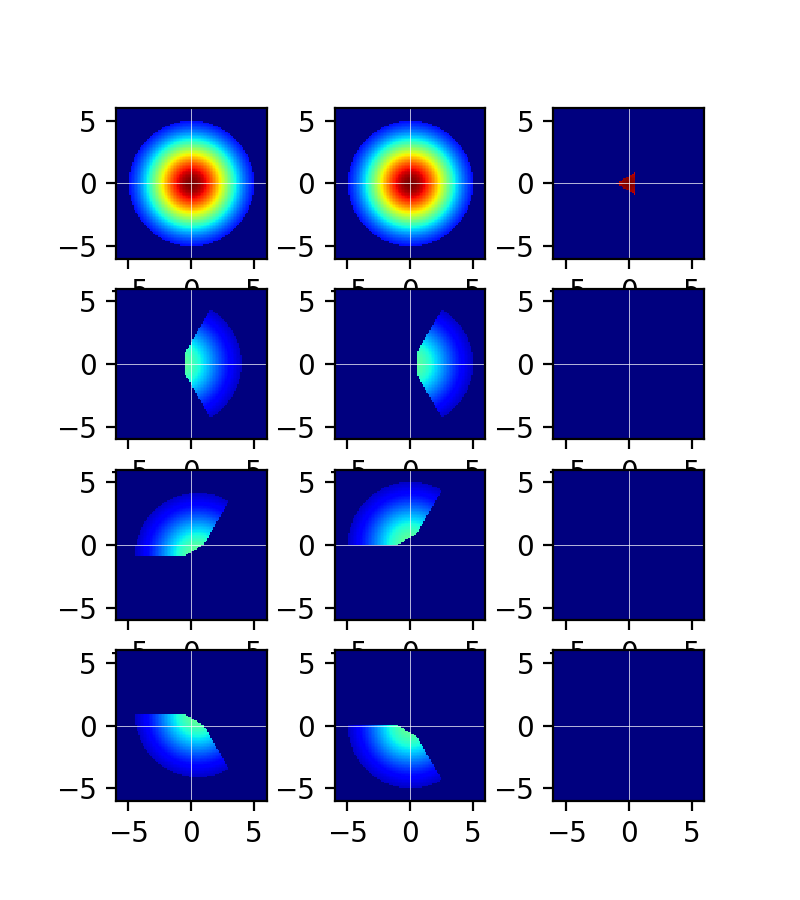

In [5]:
zchip = 1.0
nr=3
testBeams = gratings.maskedGaussianGratingMOTBeams(delta=-1., s=1., nr=nr, thd=np.pi/4,
                                                   pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
                                                   reflected_pol=np.array([np.pi, 0]),
                                                   reflected_pol_basis='poincare', eta=None, eta0=None, wb=5.0,
                                                   rs=5.0, return_basis_vectors=False, center_hole=0.5,
                                                   outer_radius=5.0, zgrating=zchip, grating_angle=0)
x_beta = 6
X, Y = np.meshgrid(np.linspace(-x_beta, x_beta, 101),
                   np.linspace(-x_beta, x_beta, 101))
z_tests = [zchip-1, zchip-1e-9, zchip+1]

plt.figure("Laser Beams", figsize=(4, 1.5*nr))
plt.clf()
for jj, laserBeam in enumerate(testBeams.beam_vector):
    for ii, z_test in enumerate(z_tests):
        plt.subplot(len(testBeams.beam_vector), len(z_tests), jj*len(z_tests)+ii+1)
        Rt=np.array([X, Y, z_test*np.ones(X.shape)])
        tt=np.zeros(X.shape)
        plt.imshow(laserBeam.beta(R=Rt,t=tt),
                   origin='lower',
                   extent=(-x_beta, x_beta,
                           -x_beta, x_beta))
        plt.clim((0, 1))
        plt.set_cmap('jet')
        # Make a cross-hair:
        plt.plot([0, 0], [-x_beta, x_beta],
                 'w-', linewidth=0.25)
        plt.plot([-x_beta, x_beta], [0, 0],
                 'w-', linewidth=0.25)

<IPython.core.display.Javascript object>


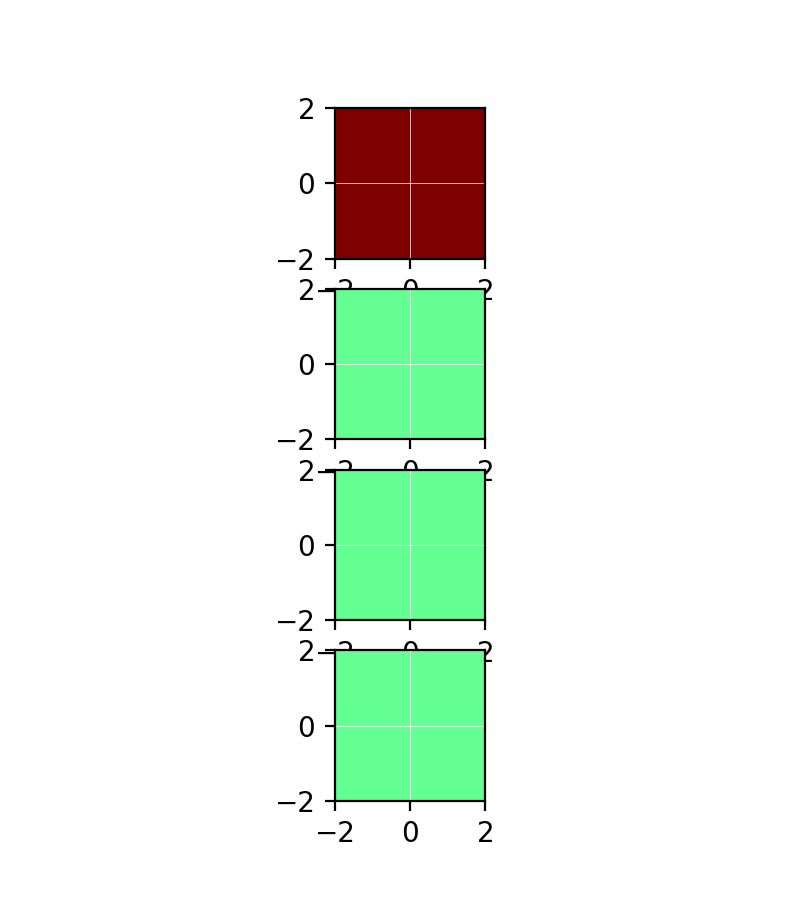

[0. 0. 1.]
[-0.70710678 -0.         -0.70710678]
[ 0.35355339 -0.61237244 -0.70710678]
[ 0.35355339  0.61237244 -0.70710678]


In [7]:
nr=3
testBeams = gratings.infiniteGratingMOTBeams(delta=-1., s=1., nr=nr, thd=np.pi/4,
                                             pol=np.array([-1/np.sqrt(2), 1j/np.sqrt(2), 0]),
                                             reflected_pol=np.array([np.pi, 0]),
                                             reflected_pol_basis='poincare', eta=None,
                                             return_basis_vectors=False, grating_angle=0)
x_beta = 2
X, Y = np.meshgrid(np.linspace(-x_beta, x_beta, 101),
                   np.linspace(-x_beta, x_beta, 101))
z_tests = [0]

plt.figure("Infinite Beams", figsize=(4, 1.5*nr))
plt.clf()
for jj, laserBeam in enumerate(testBeams.beam_vector):
    for ii, z_test in enumerate(z_tests):
        plt.subplot(len(testBeams.beam_vector), len(z_tests), jj*len(z_tests)+ii+1)
        Rt=np.array([X, Y, z_test*np.ones(X.shape)])
        tt=np.zeros(X.shape)
        print(laserBeam.kvec())
        plt.imshow(laserBeam.beta(R=Rt,t=tt),
                   origin='lower',
                   extent=(-x_beta, x_beta,
                           -x_beta, x_beta))
        plt.clim((0, 1))
        plt.set_cmap('jet')
        # Make a cross-hair:
        plt.plot([0, 0], [-x_beta, x_beta],
                 'w-', linewidth=0.25)
        plt.plot([-x_beta, x_beta], [0, 0],
                 'w-', linewidth=0.25)